# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math

## 1. Data Exploration 

Data used here is Ames House pricing dataset, which could be found on Kaggle [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv).

### Read Dataset

In [2]:
data = pd.read_csv('data/housing/train.csv')
test_data = pd.read_csv('data/housing/test.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Understanding Dataset

In [3]:
for col in data.columns:
    print(col, end =" ,")

Id ,MSSubClass ,MSZoning ,LotFrontage ,LotArea ,Street ,Alley ,LotShape ,LandContour ,Utilities ,LotConfig ,LandSlope ,Neighborhood ,Condition1 ,Condition2 ,BldgType ,HouseStyle ,OverallQual ,OverallCond ,YearBuilt ,YearRemodAdd ,RoofStyle ,RoofMatl ,Exterior1st ,Exterior2nd ,MasVnrType ,MasVnrArea ,ExterQual ,ExterCond ,Foundation ,BsmtQual ,BsmtCond ,BsmtExposure ,BsmtFinType1 ,BsmtFinSF1 ,BsmtFinType2 ,BsmtFinSF2 ,BsmtUnfSF ,TotalBsmtSF ,Heating ,HeatingQC ,CentralAir ,Electrical ,1stFlrSF ,2ndFlrSF ,LowQualFinSF ,GrLivArea ,BsmtFullBath ,BsmtHalfBath ,FullBath ,HalfBath ,BedroomAbvGr ,KitchenAbvGr ,KitchenQual ,TotRmsAbvGrd ,Functional ,Fireplaces ,FireplaceQu ,GarageType ,GarageYrBlt ,GarageFinish ,GarageCars ,GarageArea ,GarageQual ,GarageCond ,PavedDrive ,WoodDeckSF ,OpenPorchSF ,EnclosedPorch ,3SsnPorch ,ScreenPorch ,PoolArea ,PoolQC ,Fence ,MiscFeature ,MiscVal ,MoSold ,YrSold ,SaleType ,SaleCondition ,SalePrice ,

We will use only these columns: `LotArea`, `BedroomAbvGr`, `YearBuilt`, `1stFlrSF`, `2ndFlrSF`, and `SalePrice`

In [4]:
data = data[['LotArea', 'BedroomAbvGr', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'SalePrice']]
print(data.isnull().values.any())
data.describe()

False


,LotArea,BedroomAbvGr,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,2.866438,1971.267808,1162.626712,346.992466,180921.195890
std,9981.264932,0.815778,30.202904,386.587738,436.528436,79442.502883
min,1300.000000,0.000000,1872.000000,334.000000,0.000000,34900.000000
25%,7553.500000,2.000000,1954.000000,882.000000,0.000000,129975.000000
50%,9478.500000,3.000000,1973.000000,1087.000000,0.000000,163000.000000
75%,11601.500000,3.000000,2000.000000,1391.250000,728.000000,214000.000000
max,215245.000000,8.000000,2010.000000,4692.000000,2065.000000,755000.000000


### Feature Engineering

In [5]:
train_data = pd.DataFrame()
train_data['area'] = data.LotArea
train_data['age'] = 2023 - data.YearBuilt
train_data['bedrooms'] = data.BedroomAbvGr
train_data['floors'] = data['2ndFlrSF'].map(lambda x: int(x != 0) + 1 ) ## for the sake of simplification but not necessarily better
train_data['price'] = data.SalePrice
train_data.describe() 

,area,age,bedrooms,floors,price
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,51.732192,2.866438,1.432192,180921.195890
std,9981.264932,30.202904,0.815778,0.495550,79442.502883
min,1300.000000,13.000000,0.000000,1.000000,34900.000000
25%,7553.500000,23.000000,2.000000,1.000000,129975.000000
50%,9478.500000,50.000000,3.000000,1.000000,163000.000000
75%,11601.500000,69.000000,3.000000,2.000000,214000.000000
max,215245.000000,151.000000,8.000000,2.000000,755000.000000


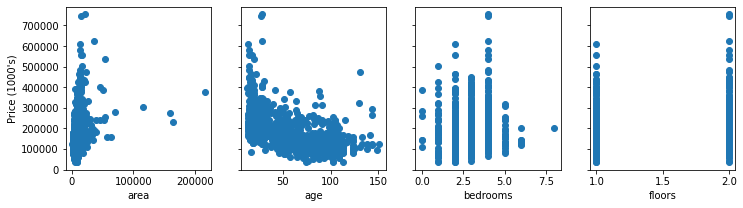

In [6]:
features = list(train_data.columns)
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(train_data.loc[:,features[i]],train_data.price)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

### Feature Scaling

In [131]:
def normalize_min_max(x, min_x, max_x):
    return (x - min_x)/(max_x - min_x)

In [132]:
def normalize_mean(x, min_x, max_x, mean_x):
    return (x - mean_x)/(max_ - min_x)

In [39]:
def normalize_z_score(x):
    return (x - np.mean(x)) / np.std(x) 

In [41]:
def normalize_data(df, normalization_function):
    X_train = pd.DataFrame()

    for i in range(4):
        x = train_data[features[i]]
        mean_arr[i] = np.mean(x)
        std_arr[i] = np.std(x)

        X_train[features[i]] = normalization_function(x)
    X_train = X_train.to_numpy()

    return X_train

## 2. Gradient Descent

In [44]:
def calculate_gradient(X, y, w, b ):
    """
    Calculates gradient for linear regression
    Args:
        X (ndarray, (m,n)): data, m examples with n features
        y (ndarray, (m,)) : target values
        w (ndarray, (n,)) : model parameters (weights)
        b (scalar)        : model parameter (bias)
        
    Returns:
        dj_dw (ndarray, (n,)): gradient of cost wrt to parameters w.
        dj_db (scalar)       : gradient of cost wrt to parameter b.
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        err = (np.dot(w,X[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j] 
        dj_db = dj_db + err
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [45]:
def calculate_cost(X, y, w, b):
    """
    Calculates cost for multiple variable linear regression
    Args:
        X (ndarray, (m,n)): data, m examples with n features
        y (ndarray, (m,)) : target values
        w (ndarray, (n,)) : model parameters (weights)
        b (scalar)        : model parameters (bias)
    
    Returns:
        cost (scalar)     : cost (error between predictions and target values)
    """
    
    m = X.shape[0]
    cost = 0.
    for i in range(m):
        p = (np.dot(w, X[i]) + b) ## prediction
        cost = cost + (p - y[i])**2
    cost = cost / (2 * m)
    return cost   

In [46]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs gradient descent by updating w, b using alpha.
    Args:
        X    (ndarray, (m,n)): data, m examples with n features
        y    (ndarray, (m,)) : target values
        w_in (ndarray (n,))  : initial values for model parameters (weights)
        b_in (scalar)        : initial value for model parameter (bias)
        cost_fuction         : function that calculates cost
        gradient_function    : function that calculates gradients
        alpha (float)        : learning rate
        num_iters (int)      : number of iterations to run gradient descent
        
    Returns:
        w (ndarray, (m,n))   : updated values for model parameters (weights)
        b (scalar)           : updates value for model parameter (bias)
    """
    w = w_in
    b = b_in
    loss_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X,y ,w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        ## compute loss
        loss_history.append(cost_function(X, y, w, b))
        
        if (i % math.ceil(num_iters/10) == 0):
            print(f"Iteration: {i:4d}, loss: {loss_history[-1]:0.2f}")
            
    return w, b, loss_history        

## 3. Train

### Using Z-Score

In [61]:
X_train = normalize_data(train_data,normalize_z_score)
m, n = X_train.shape
y_train = train_data.price
initial_w = np.zeros(n)
initial_b = 0.

alpha = 0.0006
num_iters = 10000

w, b, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, calculate_cost, calculate_gradient, alpha, num_iters)

print(w,b)

Iteration:    0, loss: 19498523863.99
Iteration: 1000, loss: 7221915766.68
Iteration: 2000, loss: 3529068525.21
Iteration: 3000, loss: 2417401466.75
Iteration: 4000, loss: 2082527268.61
Iteration: 5000, loss: 1981575563.72
Iteration: 6000, loss: 1951112337.86
Iteration: 7000, loss: 1941906290.02
Iteration: 8000, loss: 1939117846.67
Iteration: 9000, loss: 1938270156.23
[ 19023.47913919 -42854.81966676   9659.80760464  10728.74846471] 180473.54390453442


### Plot loss

Text(0.5, 0, 'Iterations')

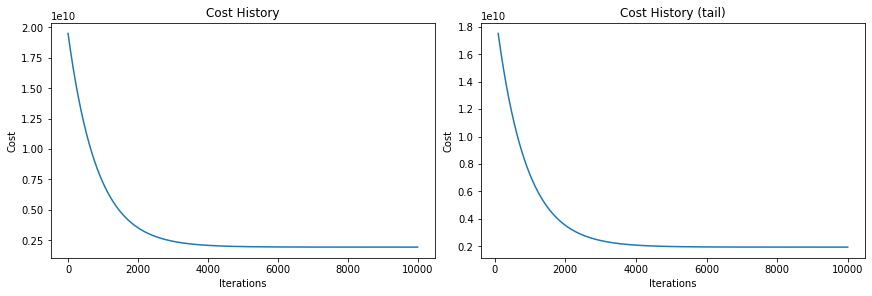

In [62]:
fig , (ax1, ax2) = plt.subplots(1,2,constrained_layout=True ,figsize=(12,4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost History"); ax2.set_title("Cost History (tail)")
ax1.set_ylabel("Cost");        ax2.set_ylabel("Cost");
ax1.set_xlabel("Iterations");  ax2.set_xlabel("Iterations")

### Plot Predictions

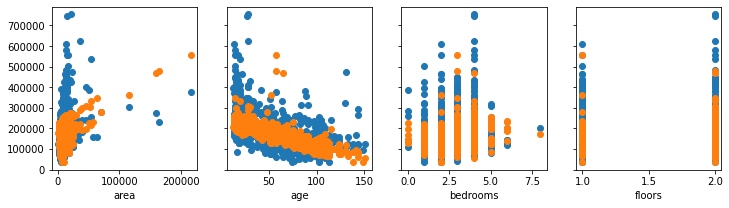

In [63]:
prediction = []
for i in range(m):
    prediction.append(np.dot(w,X_train[i]) + b)

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(train_data.loc[:,features[i]],train_data.price)
    ax[i].scatter(train_data.loc[:,features[i]],prediction)
    ax[i].set_xlabel(features[i])
